In [10]:
import os

os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "4" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "4" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "4" # export NUMEXPR_NUM_THREADS=6


In [2]:
import numpy as np

import healpy as hp
import sys as sys
import matplotlib.pyplot as plt

In [3]:

sys.path.append('..')
import SHT

In [4]:
nside = 128
lmax = 383
nsim = 2000


In [5]:
cl = np.array([1 for l in range(1,lmax+1)] )
np.random.seed(23333)
maps = np.asfortranarray(np.transpose([hp.sphtfunc.synfast(cl, nside, lmax)
                 for i in range(nsim)]) )

In [6]:
sht = SHT.SHT(nside, lmax, nsim)

In [7]:
%%time
alms = sht.t2alm(maps)

CPU times: user 15 s, sys: 1.35 s, total: 16.4 s
Wall time: 4.86 s


In [11]:
alms_hp = sht.convert_alm_healpy(alms)

In [12]:
alms_hp = (alms_hp[0,:,:] + 1j * alms_hp[1,:,:])

In [8]:
%%time
alms2_hp = np.array([hp.map2alm(maps[:,i], lmax=lmax, iter=0) for i in range(nsim)])

CPU times: user 50.6 s, sys: 3.51 s, total: 54.1 s
Wall time: 14.5 s


In [33]:
sys.path.append('./obj')
import fastSHT

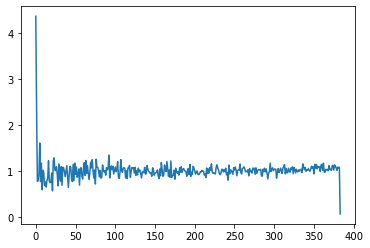

In [15]:
plt.plot(hp.alm2cl(alms2_hp[0,:]))
#plt.xlim(0,350)
#plt.ylim(0,2)

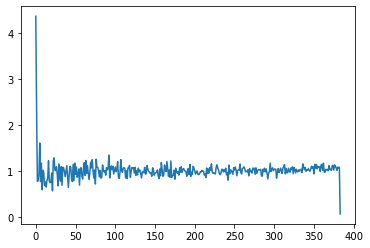

In [13]:
plt.plot(hp.alm2cl(alms_hp[:,0]))
#plt.xlim(0,350)
#plt.ylim(0,2)

In [24]:
cl = np.array([hp.alm2cl(alms_hp[:,i]) for i in range(nsim)])
cl2 = np.array([hp.alm2cl(alms2_hp[i,:]) for i in range(nsim)])

In [27]:
(np.abs(cl2 - cl) / cl.mean()).max()

3.9577852358078905e-07